In [2]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('parkinson.csv')

In [4]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.shape

(195, 24)

In [8]:
df = df.drop_duplicates(ignore_index = True)
df.shape

(195, 24)

In [10]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [16]:
# Putting feature variable to X
X = df.drop(['status', 'name'],axis=1)

# Putting response variable to y
y = df['status']

In [12]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((156, 22), (39, 22))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
!pip install six

In [20]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

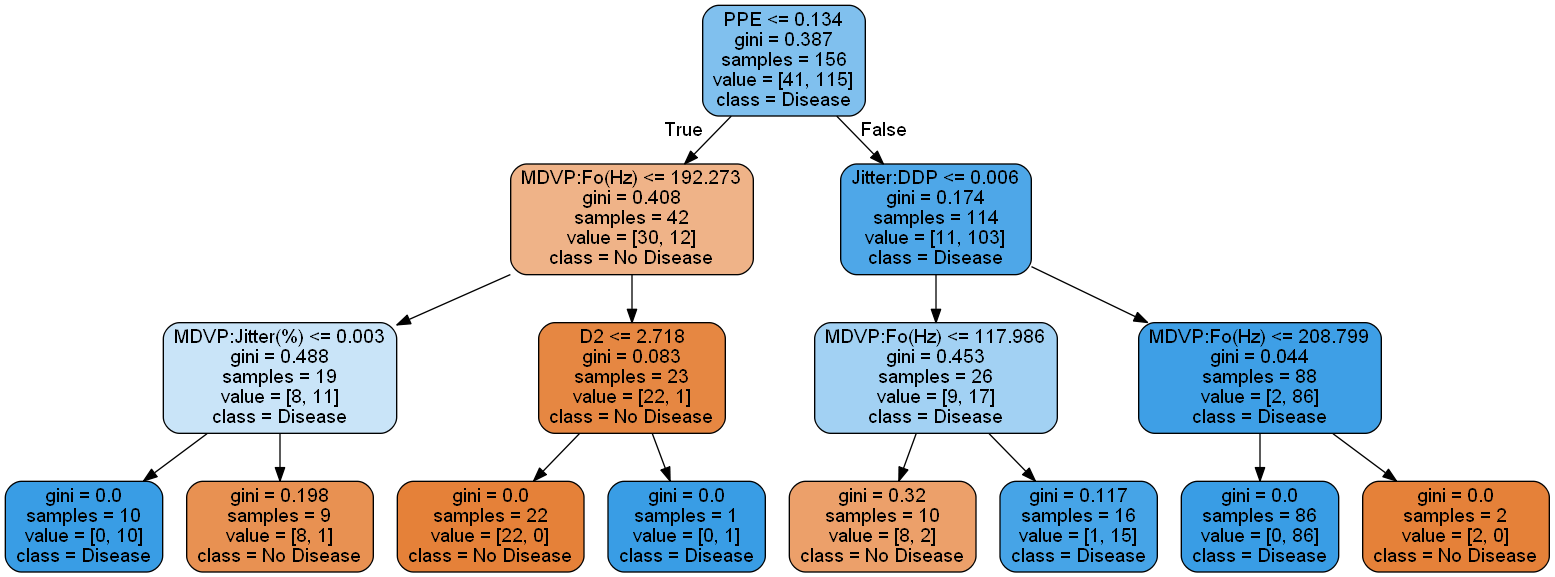

In [21]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [22]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9743589743589743


array([[ 40,   1],
       [  3, 112]], dtype=int64)

In [25]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9230769230769231


array([[ 5,  2],
       [ 1, 31]], dtype=int64)

Creating helper functions to evaluate model performance and help plot the decision tree

In [26]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [27]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Without setting any hyper-parameters

In [20]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

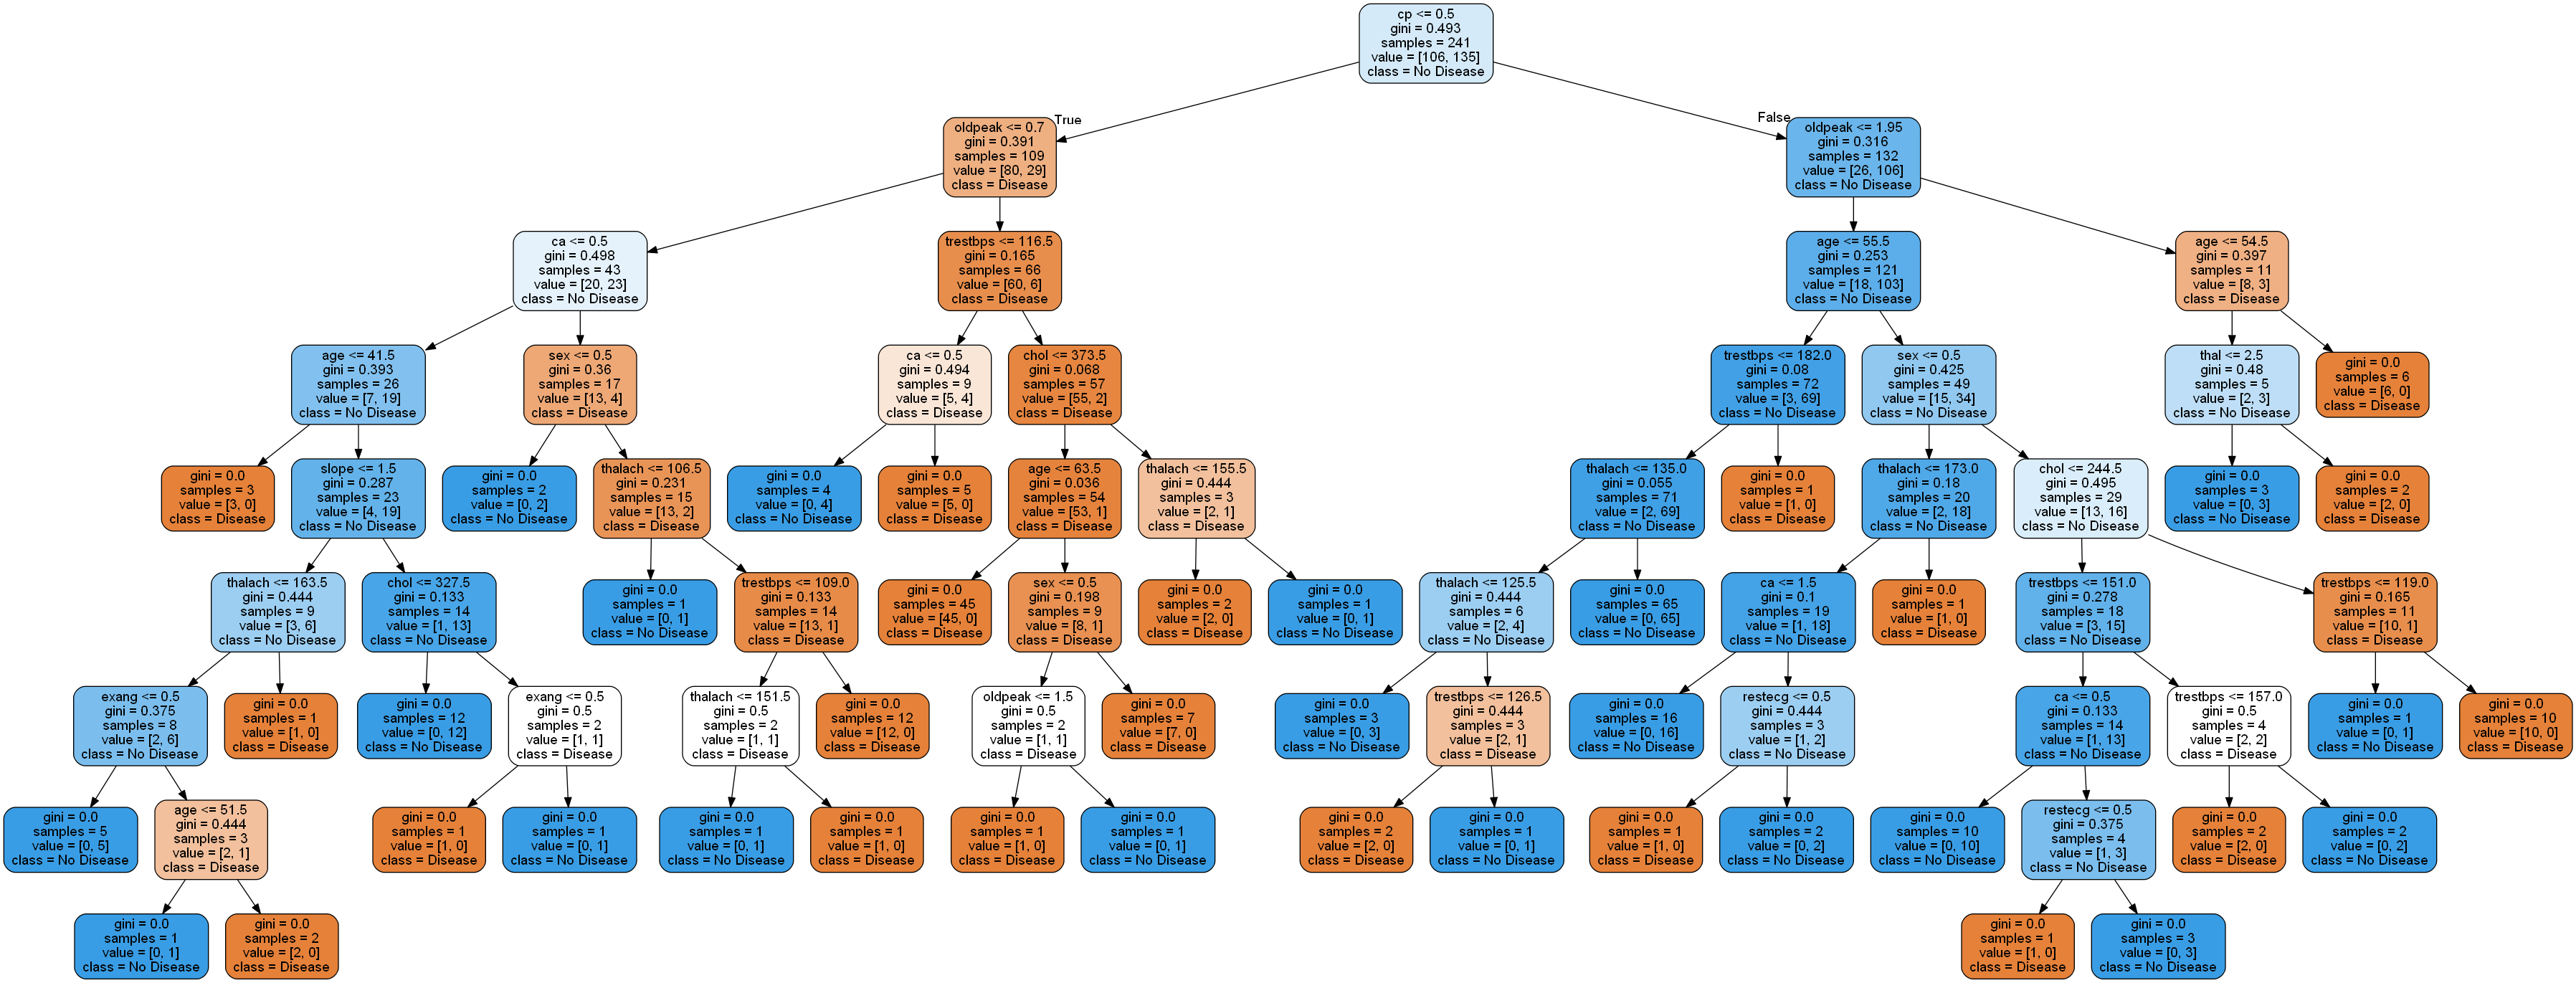

In [21]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [22]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[106   0]
 [  0 135]]
--------------------------------------------------
Test Accuracy : 0.7377049180327869
Test Confusion Matrix:
[[25  7]
 [ 9 20]]


### Controlling the depth of the tree

In [23]:
?DecisionTreeClassifier

In [24]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

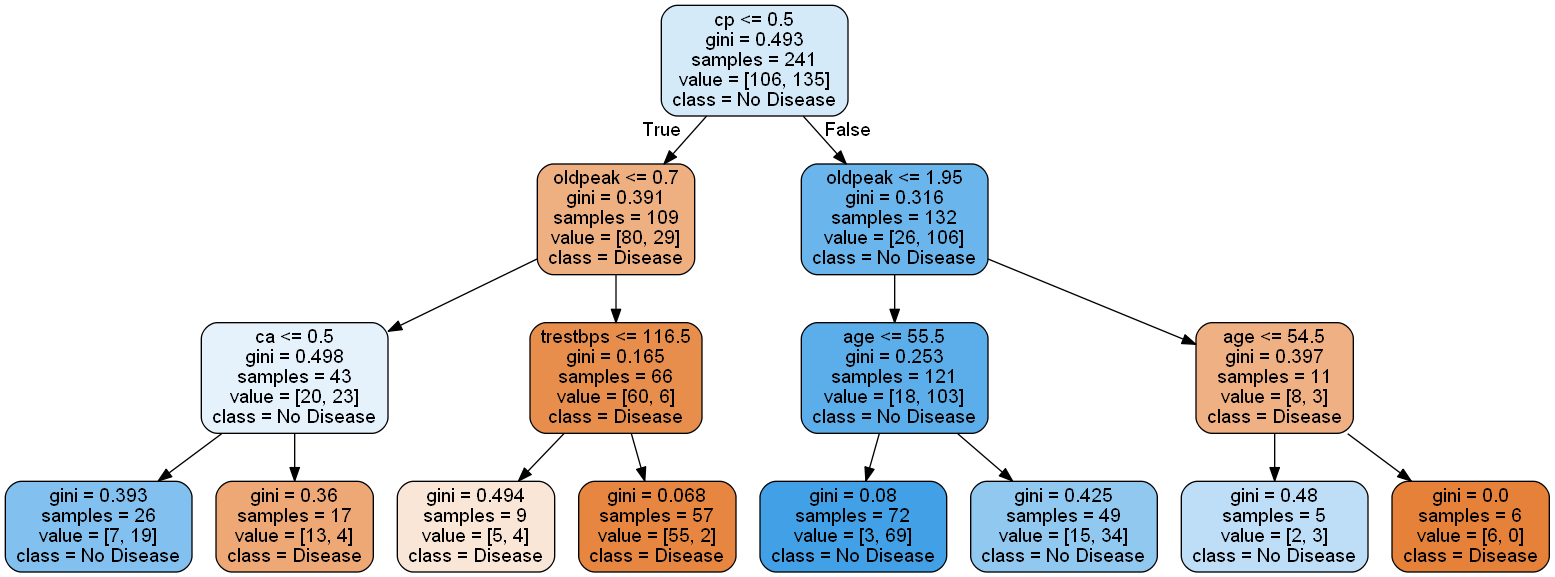

In [25]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [26]:
evaluate_model(dt_depth)

Train Accuracy : 0.8464730290456431
Train Confusion Matrix:
[[ 79  27]
 [ 10 125]]
--------------------------------------------------
Test Accuracy : 0.7377049180327869
Test Confusion Matrix:
[[24  8]
 [ 8 21]]


### Specifying minimum samples before split

In [27]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

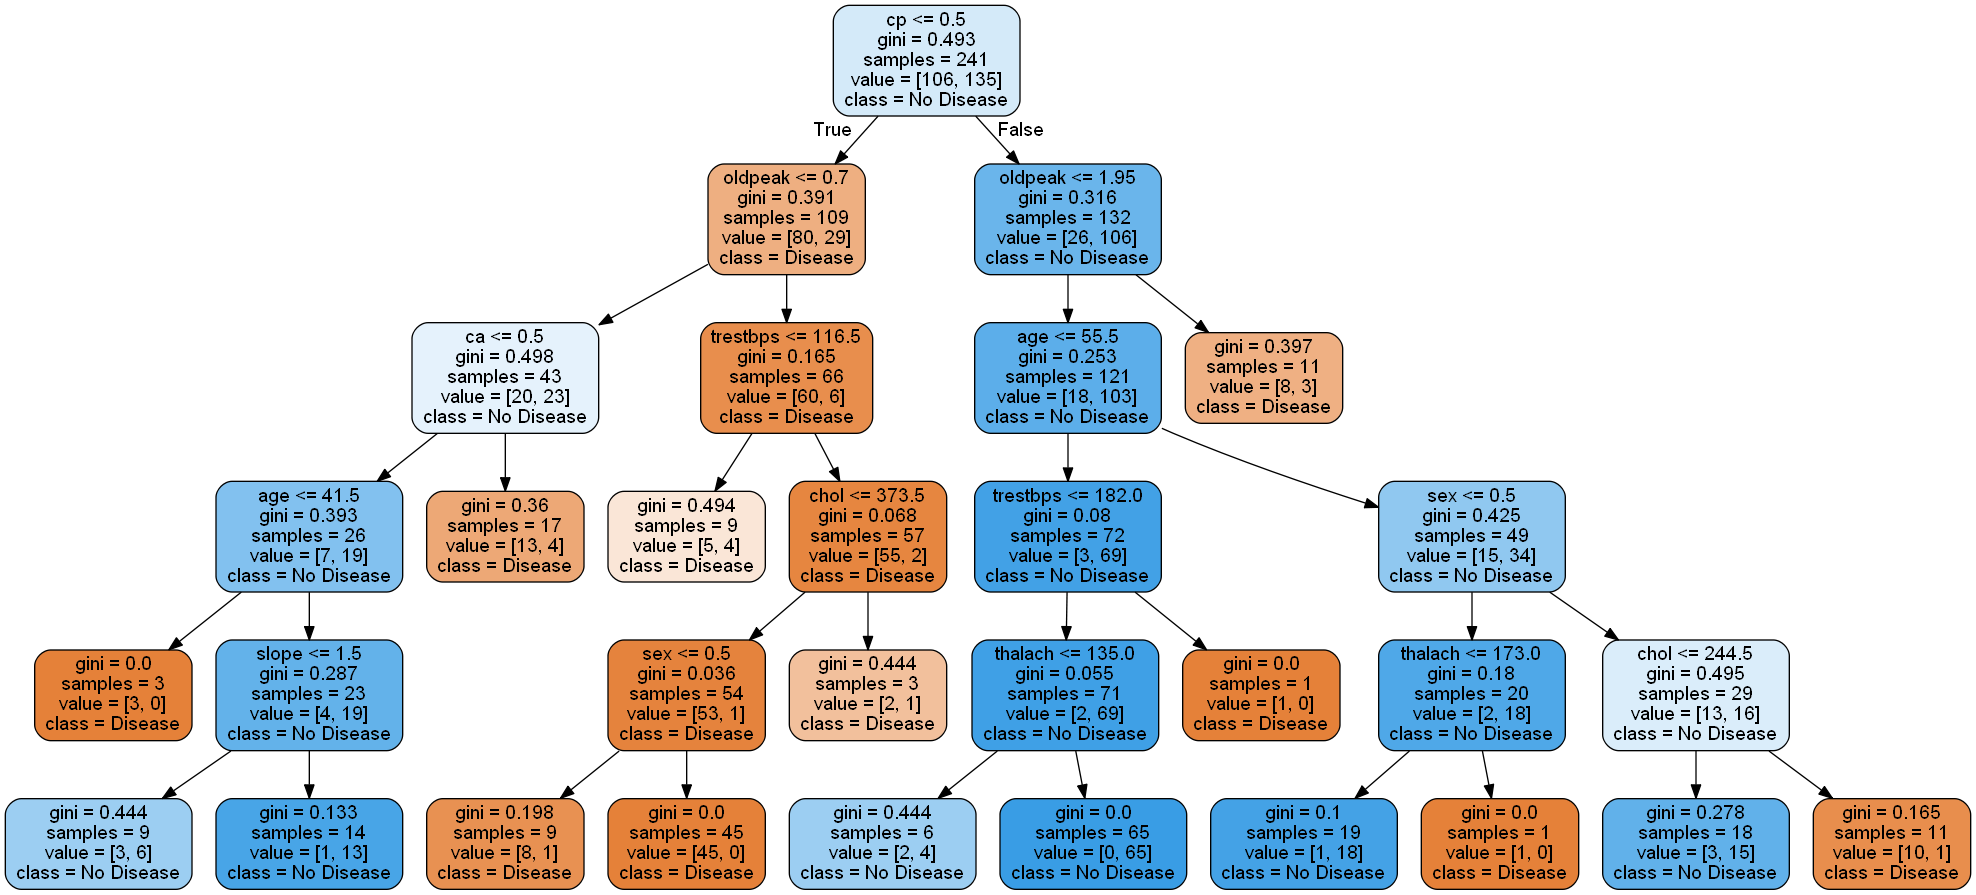

In [28]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [29]:
evaluate_model(dt_min_split)

Train Accuracy : 0.9004149377593361
Train Confusion Matrix:
[[ 96  10]
 [ 14 121]]
--------------------------------------------------
Test Accuracy : 0.7377049180327869
Test Confusion Matrix:
[[26  6]
 [10 19]]


### Specifying minimum samples in leaf node

In [30]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

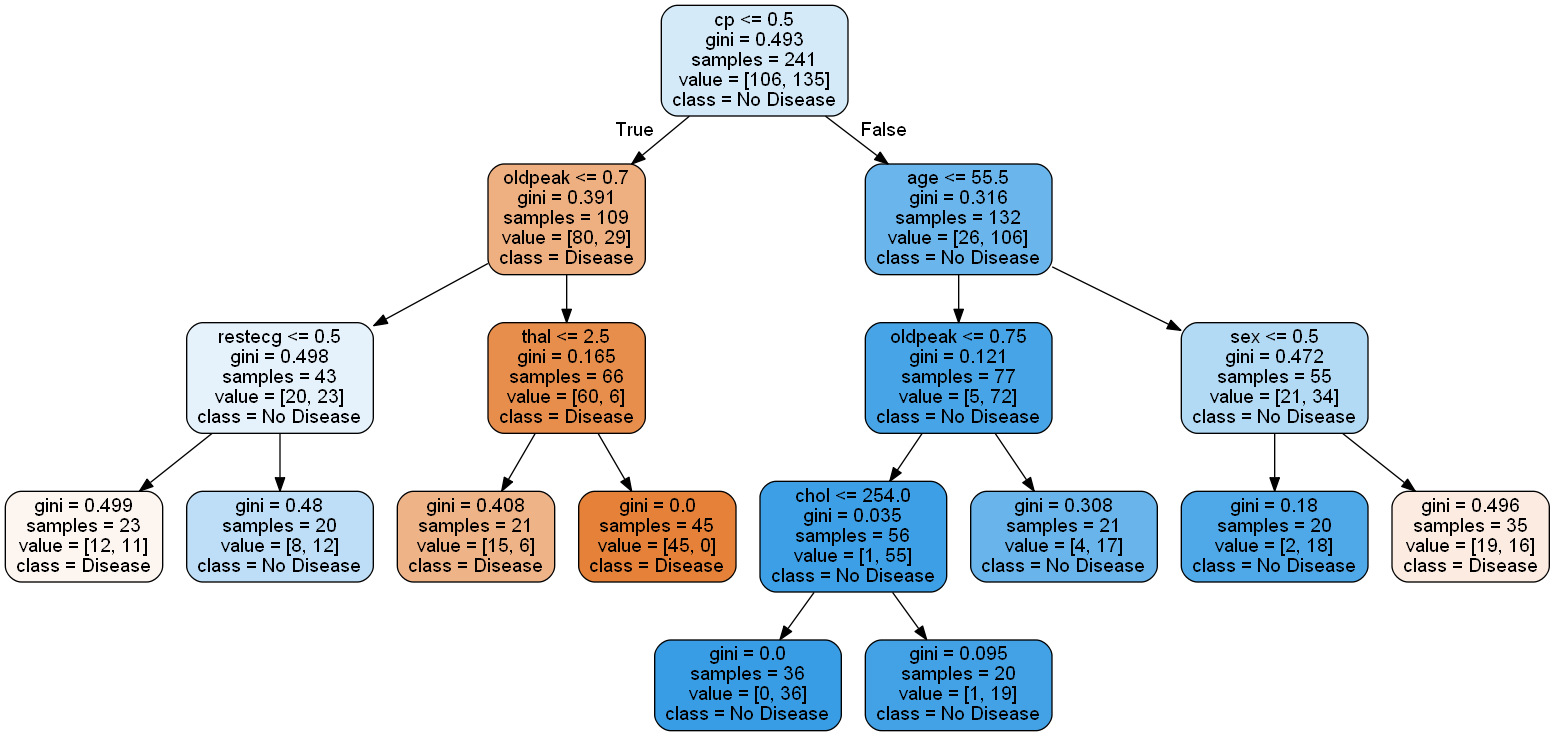

In [31]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [32]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.8008298755186722
Train Confusion Matrix:
[[ 91  15]
 [ 33 102]]
--------------------------------------------------
Test Accuracy : 0.6885245901639344
Test Confusion Matrix:
[[25  7]
 [12 17]]


### Using Entropy instead of Gini

In [33]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

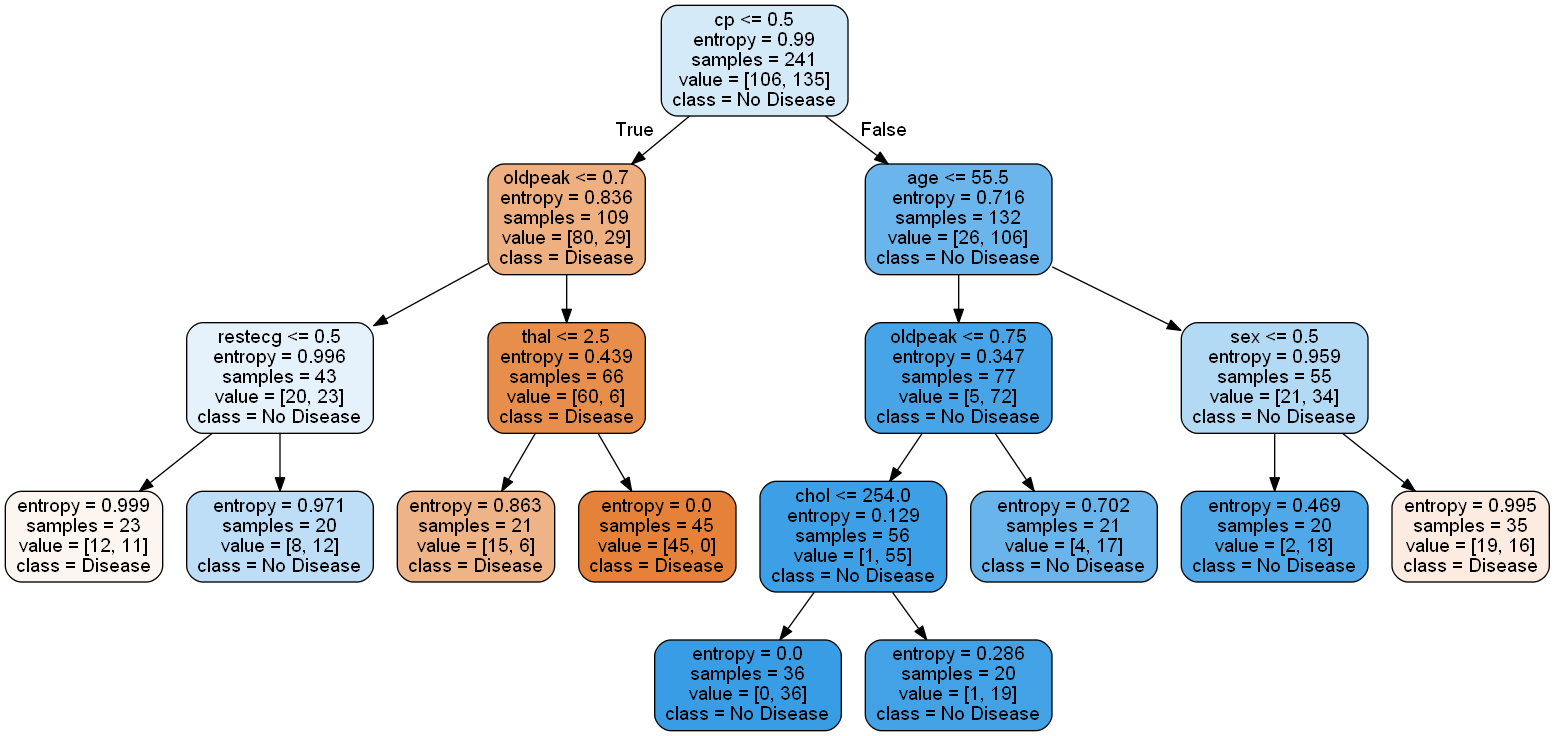

In [34]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [35]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.8008298755186722
Train Confusion Matrix:
[[ 91  15]
 [ 33 102]]
--------------------------------------------------
Test Accuracy : 0.6885245901639344
Test Confusion Matrix:
[[25  7]
 [12 17]]


### Hyper-parameter tuning

In [28]:
dt = DecisionTreeClassifier(random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV

In [56]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [3, 4, 5, 6],
    'criterion': ["gini", "entropy"]
}

In [39]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [57]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, refit= True, scoring = "accuracy")

In [58]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Wall time: 620 ms


[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    0.5s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 10],
                         'min_samples_leaf': [3, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [34]:
#score_df = pd.DataFrame(grid_search.cv_results_)
#score_df.head()

In [33]:
#score_df.nlargest(5,"mean_test_score")

In [59]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       random_state=42)

In [60]:
dt_best = grid_search.best_estimator_

In [61]:
evaluate_model(dt_best)

Train Accuracy : 0.967948717948718
Train Confusion Matrix:
[[ 36   5]
 [  0 115]]
--------------------------------------------------
Test Accuracy : 0.9487179487179487
Test Confusion Matrix:
[[ 5  2]
 [ 0 32]]


In [45]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



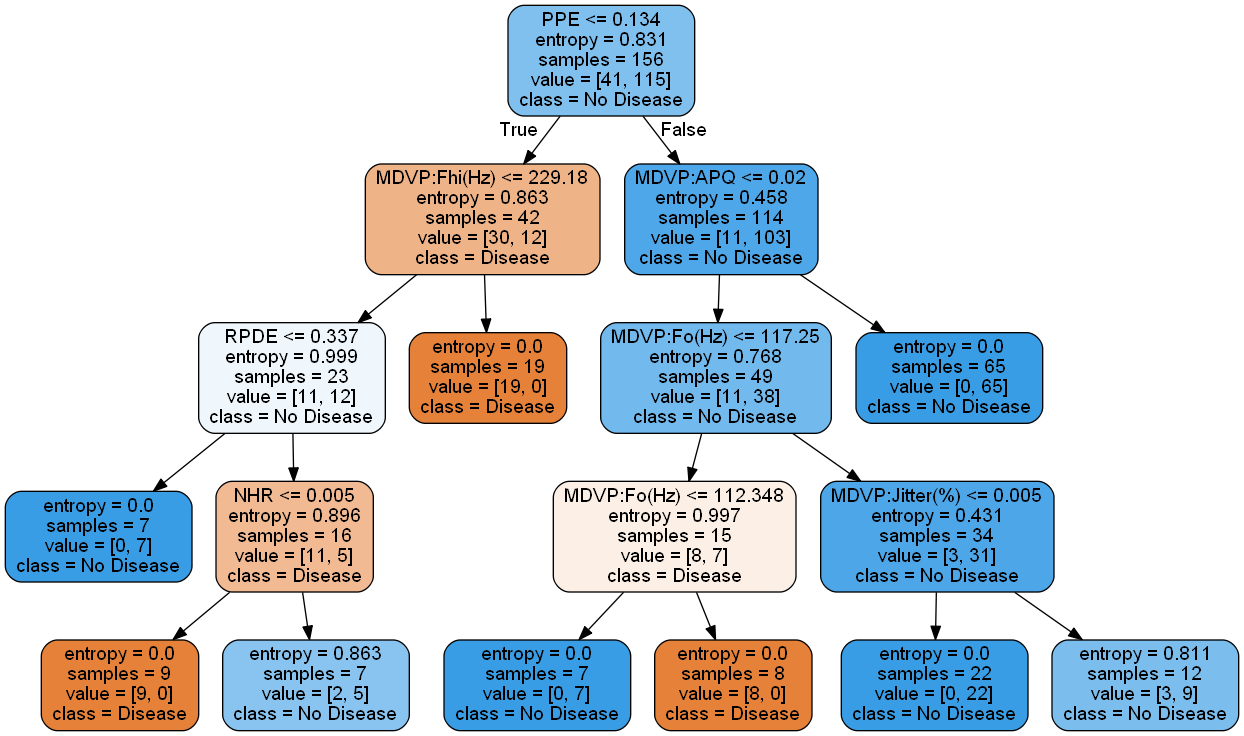

In [63]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

## Random Forest

#### Grid search for hyper-parameter tuning

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
classifier_rf = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4, max_features=4,
                       random_state=42) 

In [93]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [5, 6, 7, 8, 9],
    'n_estimators': [40, 50, 60, 100],
    'criterion': ["entropy"]
}

In [94]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, refit= True, scoring = "accuracy")

In [95]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.9s


Wall time: 14.3 s


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   14.2s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              max_features=4,
                                              min_samples_leaf=4,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 4, 5],
                         'max_features': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [40, 50, 60, 100]},
             scoring='accuracy', verbose=1)

In [96]:
rf_best = grid_search.best_estimator_
#rf_best = classifier_rf

In [97]:
rf_best

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=6,
                       min_samples_leaf=4, n_estimators=40, random_state=42)

In [98]:
evaluate_model(rf_best)

Train Accuracy : 0.967948717948718
Train Confusion Matrix:
[[ 36   5]
 [  0 115]]
--------------------------------------------------
Test Accuracy : 0.9487179487179487
Test Confusion Matrix:
[[ 5  2]
 [ 0 32]]


- Flase negatives are more dangerous to False positives, therefore Recall value must be as close to 100% as possible. in this case Recall is around 93% which is an encouraging factor. So we say our model predicts the people who are having heart disease with a 93% accuracy, helps them preventing death.

In [99]:
sample_tree = rf_best.estimators_[0]

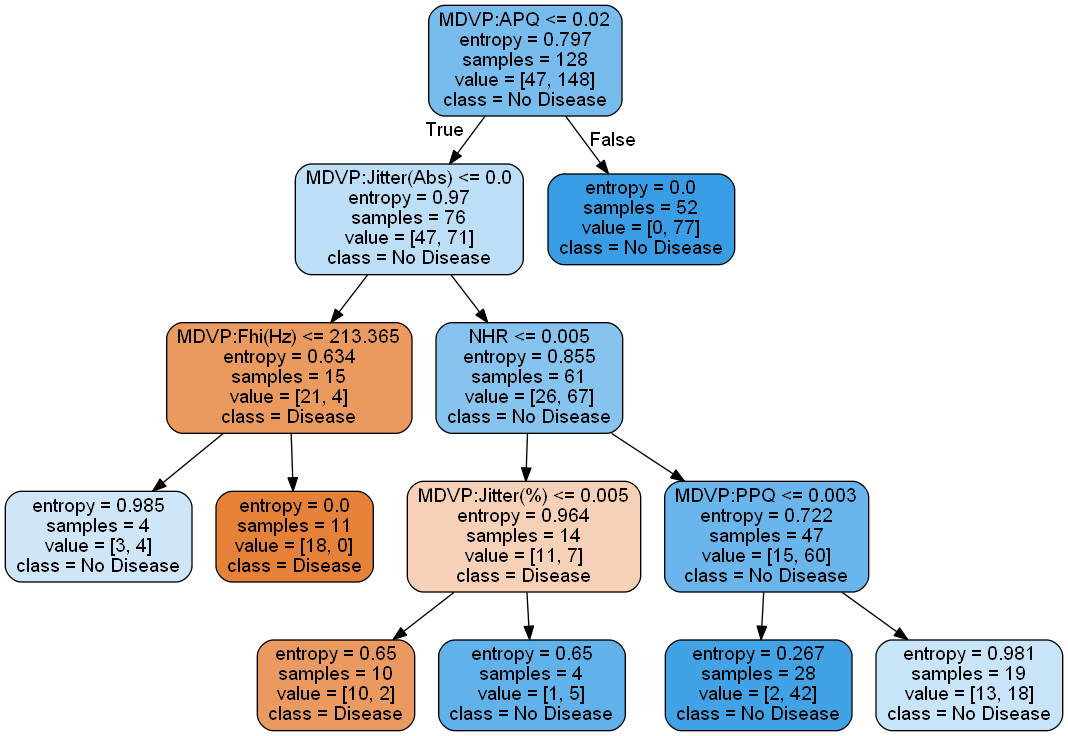

In [100]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

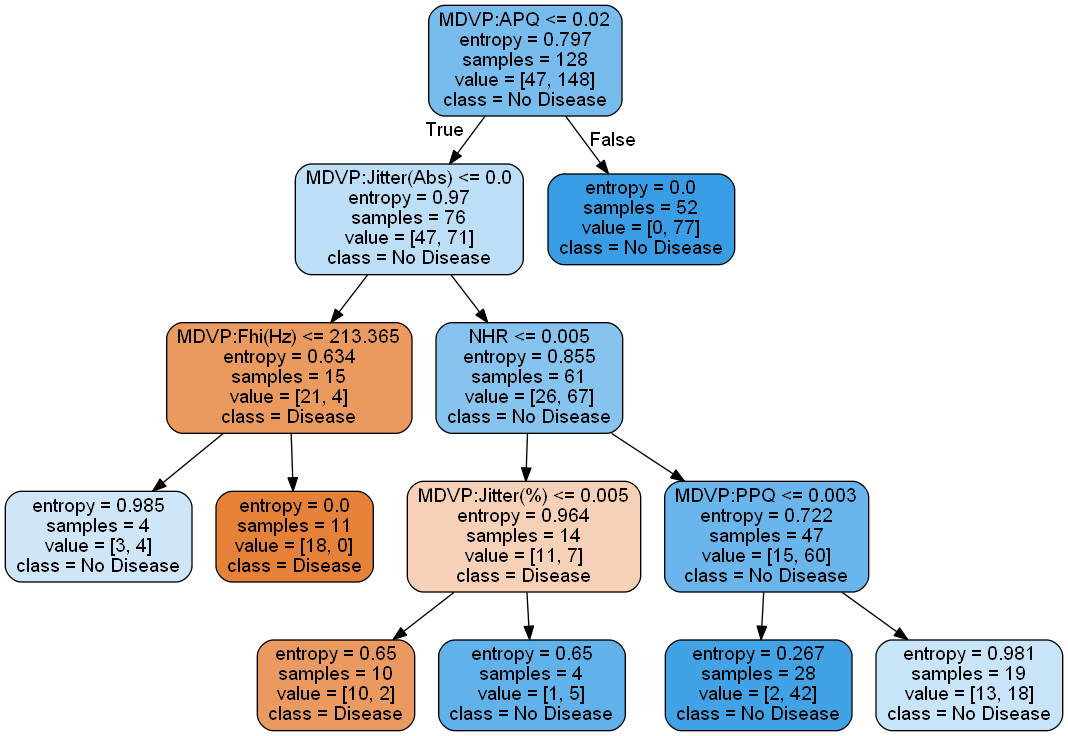

In [101]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

### Variable importance in RandomForest and Decision trees

In [102]:
classifier_rf = RandomForestClassifier( n_jobs=-1, criterion='entropy', max_depth=4, max_features=6,
                       min_samples_leaf=4, n_estimators=40, random_state=42, oob_score=True)

In [103]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=6,
                       min_samples_leaf=4, n_estimators=40, n_jobs=-1,
                       oob_score=True, random_state=42)

In [104]:
classifier_rf.oob_score_

0.8974358974358975

In [105]:
classifier_rf.feature_importances_

array([0.14990984, 0.06283038, 0.10189719, 0.01619782, 0.03229259,
       0.02914811, 0.01642682, 0.03415294, 0.02120966, 0.02502686,
       0.02014157, 0.01841078, 0.01988928, 0.03040202, 0.00955457,
       0.0187979 , 0.01741456, 0.02583474, 0.09419804, 0.06279476,
       0.03430622, 0.15916336])

In [106]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [107]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
21,PPE,0.159163
0,MDVP:Fo(Hz),0.149910
2,MDVP:Flo(Hz),0.101897
18,spread1,0.094198
1,MDVP:Fhi(Hz),0.062830
19,spread2,0.062795
20,D2,0.034306
7,Jitter:DDP,0.034153
4,MDVP:Jitter(Abs),0.032293
13,Shimmer:DDA,0.030402
